In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style("darkgrid")

In [2]:
#Loading the dataset
df = pd.read_csv("us accident.csv")
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


### Data Preparation and Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [4]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [5]:
num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=num)
len(num_df.columns)

14

In [6]:
### Handling Missing Values

In [7]:
missing_percentage = df.isna().sum().sort_values(ascending = False)/len(df)
missing_percentage

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
Sunrise_Sunset           0.000055
Civil_Twilight           0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
City                     0.000055
Country                  0.000000
Give_Way                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calming          0.000000
Stop                     0.000000
Station                  0.000000
Roundabout    

<AxesSubplot:>

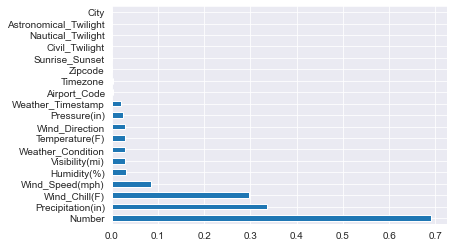

In [8]:
missing_percentage[missing_percentage != 0].plot(kind = 'barh')

### Exploratory Data Analysis

In [9]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### City Column

In [10]:
cities = df.City
len(df.City.unique())

10658

In [11]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents


Los Angeles                     39984
Miami                           36233
Charlotte                       22203
Houston                         20843
Dallas                          19497
                                ...  
Manzanita                           1
West Brooklyn                       1
Garfield Heights                    1
Belding                             1
American Fork-Pleasant Grove        1
Name: City, Length: 10657, dtype: int64

In [12]:
cities_by_accidents[:50]

Los Angeles        39984
Miami              36233
Charlotte          22203
Houston            20843
Dallas             19497
Sacramento         18431
Orlando            16169
Portland           14805
San Diego          14090
Minneapolis        12653
Atlanta            11854
Chicago            11507
Saint Paul         10084
Phoenix             9934
Raleigh             9516
San Jose            9362
Richmond            8472
Nashville           8381
Riverside           8201
Jacksonville        7815
Salt Lake City      7737
Kansas City         7500
Baton Rouge         7085
Austin              7038
Oakland             6978
Tucson              6908
Denver              6803
San Bernardino      6653
Seattle             6531
New Orleans         6479
Anaheim             6209
Ontario             6151
Fort Lauderdale     6103
Bakersfield         6048
Tampa               5987
Long Beach          5893
Corona              5813
Bronx               5563
Rochester           5396
Detroit             5245


<AxesSubplot:>

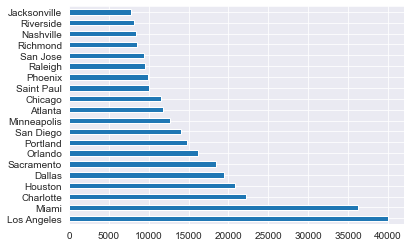

In [13]:
cities_by_accidents[:20].plot(kind = 'barh')

<AxesSubplot:xlabel='City', ylabel='Count'>

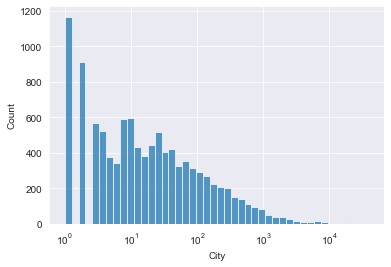

In [14]:
sns.histplot(cities_by_accidents, log_scale = True)

In [15]:
cities_by_accidents[cities_by_accidents == 1]

South Paris                     1
Aberdeen Proving Ground         1
Rebecca                         1
Hiltons                         1
Jeanerette                      1
                               ..
Manzanita                       1
West Brooklyn                   1
Garfield Heights                1
Belding                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1167, dtype: int64

In [16]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]

In [17]:
len(high_accident_cities)/len(cities_by_accidents)

0.02355259453880079

c:\users\kabir\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

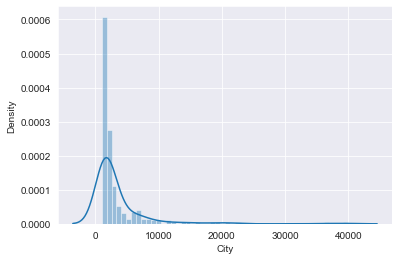

In [18]:
sns.distplot(high_accident_cities)

c:\users\kabir\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

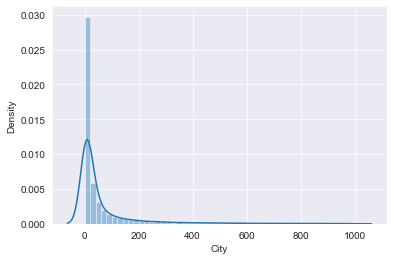

In [19]:
sns.distplot(low_accident_cities)

### Start_Time Column

In [20]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [21]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

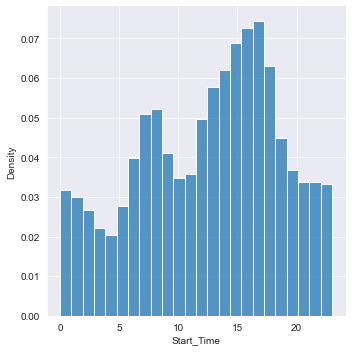

In [22]:
sns.displot(df.Start_Time.dt.hour, bins = 24, kde=False, stat="density")

#### What time of the day are accidents most frequent?
- Most accidents happens during 1 pm to 7 pm
- Next highest number of accidents occur during 6 am to 9 am

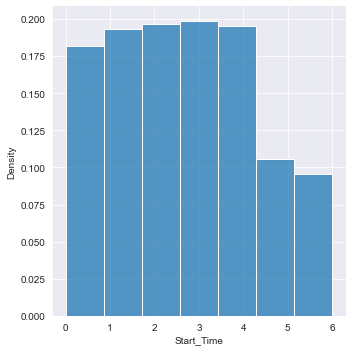

In [23]:
sns.displot(df.Start_Time.dt.dayofweek, bins = 7, kde=False, stat="density")

##### Q) Is the distribution of accidents is same as weekdays on weekends?

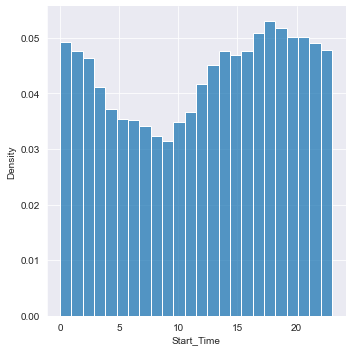

In [24]:
sunday = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.displot(sunday.dt.hour, bins = 24, kde=False, stat="density")

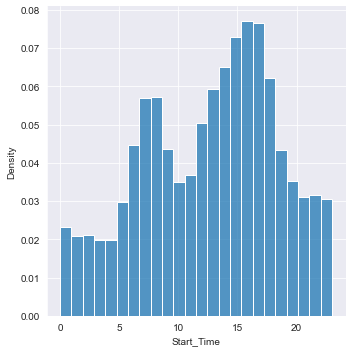

In [25]:
monday = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.displot(monday.dt.hour, bins = 24, kde=False, stat="density")

- On Sunday, the occurance of accident is higher then weekdays

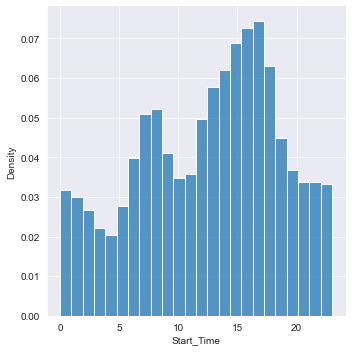

In [26]:
sns.displot(df.Start_Time.dt.hour, bins = 24, kde=False, stat="density")

##### Q) Is there month-wise trend in accidents?

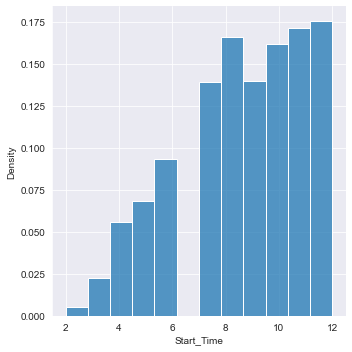

In [27]:
df_2016 = df.Start_Time[df.Start_Time.dt.year == 2016]
sns.displot(df_2016.dt.month, bins = 12, kde=False, stat="density")

- Since the data entry starts from February 2016 there are some missing values. So this chart can be  misleading

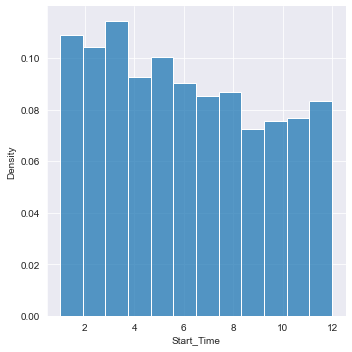

In [28]:
df_2017 = df.Start_Time[df.Start_Time.dt.year == 2017]
sns.displot(df_2017.dt.month, bins = 12, kde=False, stat="density")

- In year 2017, we can see that most of the accidents are occurred during summer time

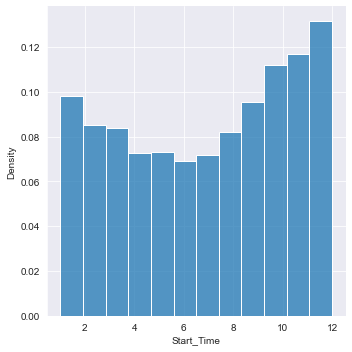

In [29]:
df_2018 = df.Start_Time[df.Start_Time.dt.year == 2018]
sns.displot(df_2018.dt.month, bins = 12, kde=False, stat="density")

- In year 2018 , we can see a balance chart compared to 2017. There's peak in accidents during Winter season

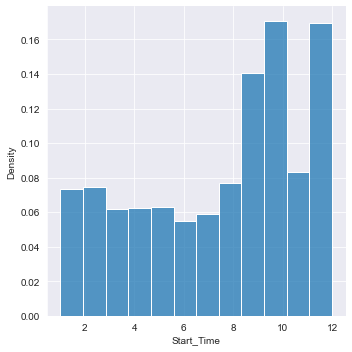

In [30]:
df_2019 = df.Start_Time[df.Start_Time.dt.year == 2019]
sns.displot(df_2019.dt.month, bins = 12, kde=False, stat="density")

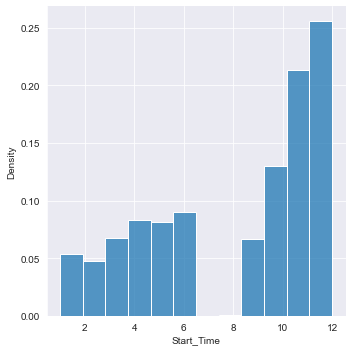

In [31]:
df_2020 = df.Start_Time[df.Start_Time.dt.year == 2020]
sns.displot(df_2020.dt.month, bins = 12, kde=False, stat="density")

#### Conclusion
- 1) We can see there is month-wise trend where there is rise of accident from the month of the October 
- 2) Theres alot of missing values so coming these trends can differ

### Start Latitude and Longititude Column

In [32]:
import folium
from folium.plugins import HeatMap

In [33]:
df.Start_Lat

0          40.10891
1          39.86542
2          39.10266
3          39.10148
4          41.06213
             ...   
1516059    34.00248
1516060    32.76696
1516061    33.77545
1516062    33.99246
1516063    34.13393
Name: Start_Lat, Length: 1516064, dtype: float64

In [34]:
df.Start_Lng

0          -83.09286
1          -84.06280
2          -84.52468
3          -84.52341
4          -81.53784
             ...    
1516059   -117.37936
1516060   -117.14806
1516061   -117.84779
1516062   -118.40302
1516063   -117.23092
Name: Start_Lng, Length: 1516064, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

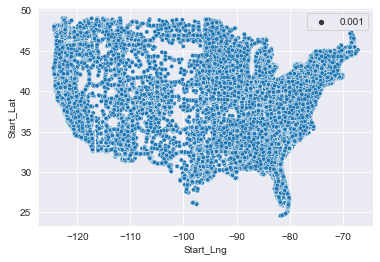

In [35]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat, size = 0.001)

In [36]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [37]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

- According to HeatMap most of the accidents occur near coast line

##### Q) State with most of the accidents?

In [38]:
state_wise_counts = df.groupby('State')['ID'].count().reset_index()
state_wise_counts = state_wise_counts.sort_values(by = "ID",ascending=False)
state_wise_counts.head()

,State,ID
3,CA,448833
8,FL,153007
35,OR,87484
41,TX,75142
32,NY,60974


- Most of the accidents occur in Califorina, Florida, Oregon, Texas and New York

##### Q) Are there more accidents in Summer or Winter Season?

- According to the data given most of the accidents occurred during Summer time from Octobar to December but we can see balance trend in 2018 where there is high number of accidents throughout the year
- But alot of data is missing so we can trust the trend show but data is correct or not

##### Q) What is the trend of accidents year over year?

- We can see that during the start of the year accidents are low, and it decreases in Mid-Months
- But it we can see the increase in accidents from the month of August or October and it reaches to its peak at December 

## Conclusion

##### Insights:
- The number of accidents per city decreases exponentially
- Less then 2.3% of cities of accidents above 1000 yearly.
- Over 1100 cities have reported just 1 accident (need to investigate).
- Most of the accidents occur in Califorina, Florida, Oregon, Texas and New York